In [110]:
# PyOD
# https://colab.research.google.com/drive/1PXNyiVd8J3M_-3jvmQOp4ruDKD0OZF3m#scrollTo=uATMzlCBx8e3

In [111]:
import warnings
warnings.filterwarnings('ignore')

Installing **PyOD**

In [112]:
!pip3 install pyod

Importing **Isolation Forest** model

In [113]:
from pyod.models.iforest import IForest
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

Generating data using **generate_data()**

In [114]:
contamination = 0.15  # percentage of outliers
n_train = 500  # number of training points
n_test = 200  # number of testing points

X_train, y_train, X_test, y_test = generate_data(
    n_train=n_train, n_test=n_test, contamination=contamination)

Initializing and training the Isolation Forest model

In [115]:
# train IForest detector
clf_name = 'IForest'
clf = IForest()
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

In [116]:
# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
IForest ROC:1.0, precision @ rank n:1.0

On Test Data:
IForest ROC:0.9927, precision @ rank n:0.9667


Visualize the results

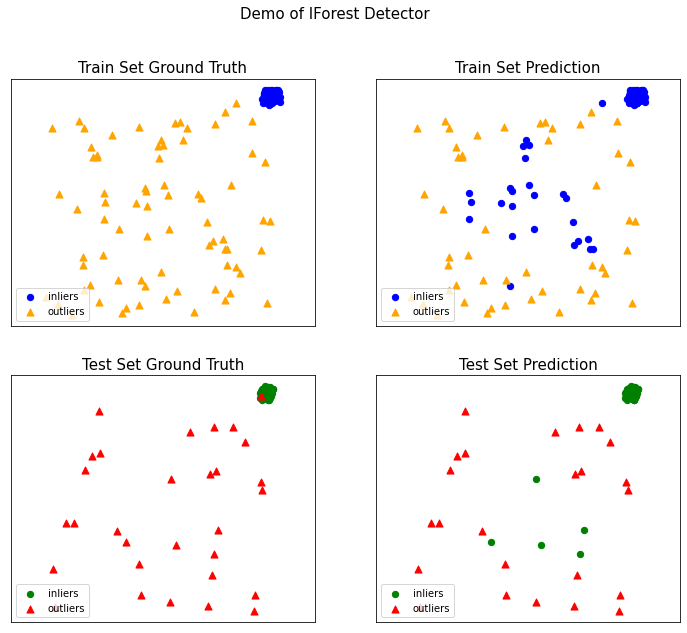

In [117]:
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)

# Interquartile range

In [118]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

In [119]:
ys = data
quartile_1, quartile_3 = np.percentile(ys, [25, 75])
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - (iqr * 1.5)
upper_bound = quartile_3 + (iqr * 1.5)
outliers_indices = np.where((ys > upper_bound) | (ys < lower_bound))

In [120]:
data[outliers_indices]

array([175.06071403, 184.53612452, 192.3932129 , 193.3053876 ,
       148.89987436, 147.47186402, -71.59374101, -49.6126162 ,
       -76.64893785, -89.67973224, -77.22230183, -92.71742883,
       -61.46520272, -60.90637692, -68.46848657, -25.10129674])

In [121]:
# Box-Plot

In [122]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5e3a716b20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5e3a72cbb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5e3a716fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5e3a72c730>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5e3a72c850>],
 'means': []}

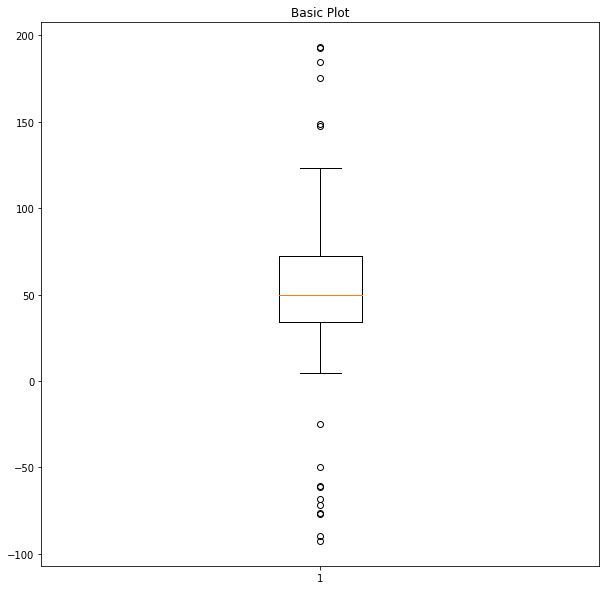

In [123]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(data)

# Automatic Outlier Detection Algorithms

## DBSCAN
Let's create a simple dataset using sklearn.datasets.make_blobs

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

Let's visualize the results. Purple dots are the outliers (marked as **-1** cluster)

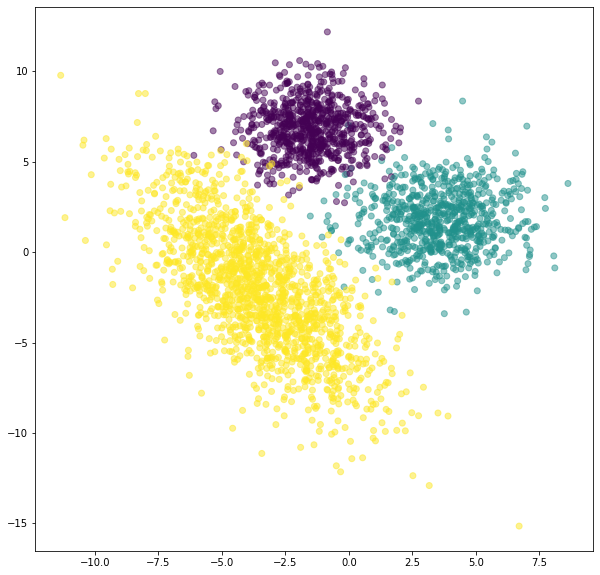

In [125]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [126]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.9, min_samples=35) # eps is the radius of the neighbourhood,
                                        #  min_samples is the number of samples that must be in the neighbourhood to consider a sample as a Base sample
dbscan.fit(X)

DBSCAN(eps=0.9, min_samples=35)

In [127]:
np.unique(dbscan.labels_) # DBSCAN found 3 clusters and some Noise samples

array([-1,  0,  1,  2])

In [128]:
len(np.where(dbscan.labels_ == -1)[0]) # let's find out how many Noise samples are there

368

Let's visualize the results. Purple dots are the outliers (marked as **-1** cluster)

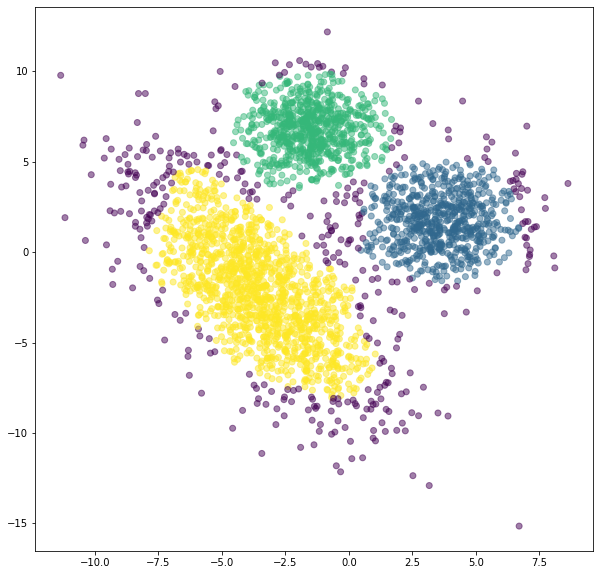

In [129]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, alpha=0.5)
plt.show()

In [130]:
dbscan = DBSCAN(eps=0.8, min_samples=35) # let's check how hyperparameters affect the DBSCAN result
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=35)

In [131]:
len(np.where(dbscan.labels_ == -1)[0]) # I think you can see the difference

583

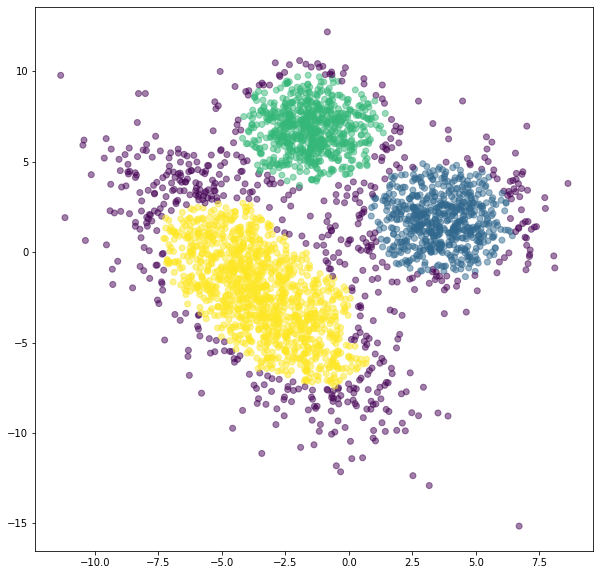

In [132]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, alpha=0.5)
plt.show()

## Minimum Covariance Determinant and Elliptic Envelope

In [133]:
import numpy as np
import pandas as pd
from sklearn.covariance import EllipticEnvelope, MinCovDet
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn.datasets import load_boston

In [134]:
data = load_boston()
X = pd.DataFrame(data=data['data'], columns=data['feature_names'])
y = data['target']

In [135]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [136]:
feature = 'RM'
envelope =  EllipticEnvelope(contamination = 0.01)
X_train = X[feature].values.reshape(-1,1)
envelope.fit(X_train)
ee = pd.DataFrame(X[feature].values, columns = [feature + '_value'])
ee['deviation'] = envelope.decision_function(X_train)
ee['anomaly'] = envelope.predict(X_train) # predict returns 1 for an inlier and -1 for an outlier

In [137]:
ee['anomaly'].value_counts()

 1    500
-1      6
Name: anomaly, dtype: int64

In [138]:
a = ee.loc[ee['anomaly'] == 1, feature + '_value']
b = ee.loc[ee['anomaly'] == -1, feature + '_value']

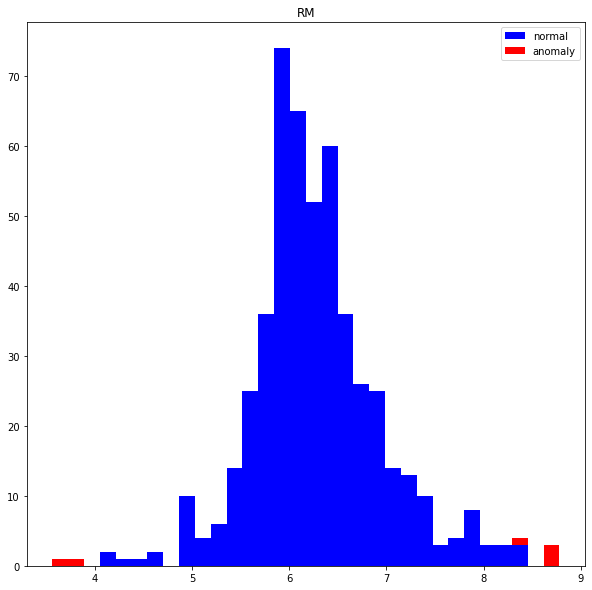

In [139]:
plt.hist([a,b], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
plt.title(feature)
plt.legend()
plt.show()

In [140]:
import numpy as np
from sklearn.covariance import MinCovDet
from sklearn.datasets import make_gaussian_quantiles
real_cov = np.array([[.8, .3],
                     [.3, .4]])
rng = np.random.RandomState(0)
X = rng.multivariate_normal(mean=[0, 0],
                                   cov=real_cov,
                                  size=500)
cov = MinCovDet(random_state=0).fit(X)

In [141]:
cov.covariance_

array([[0.74118335, 0.25357049],
       [0.25357049, 0.30531502]])

### Minimum Covariance Determinant Vs. Elliptic Envelope

This example is taken from the sklearn [official documentation](https://scikit-learn.org/stable/auto_examples/covariance/plot_mahalanobis_distances.html#sphx-glr-auto-examples-covariance-plot-mahalanobis-distances-py). Please refer to it to learn more.


In [142]:
import numpy as np

# for consistent results
np.random.seed(7)

n_samples = 125
n_outliers = 25
n_features = 2

# generate Gaussian data of shape (125, 2)
gen_cov = np.eye(n_features)
gen_cov[0, 0] = 2.
X = np.dot(np.random.randn(n_samples, n_features), gen_cov)
# add some outliers
outliers_cov = np.eye(n_features)
outliers_cov[np.arange(1, n_features), np.arange(1, n_features)] = 7.
X[-n_outliers:] = np.dot(np.random.randn(n_outliers, n_features), outliers_cov)

In [143]:
import matplotlib.pyplot as plt
from sklearn.covariance import EmpiricalCovariance, MinCovDet

# fit a MCD robust estimator to data
robust_cov = MinCovDet().fit(X)
# fit a MLE estimator to data
emp_cov = EmpiricalCovariance().fit(X)
print('Estimated covariance matrix:\n'
      'MCD (Robust):\n{}\n'
      'MLE:\n{}'.format(robust_cov.covariance_, emp_cov.covariance_))

Estimated covariance matrix:
MCD (Robust):
[[ 3.26253567e+00 -3.06695631e-03]
 [-3.06695631e-03  1.22747343e+00]]
MLE:
[[ 3.23773583 -0.24640578]
 [-0.24640578  7.51963999]]


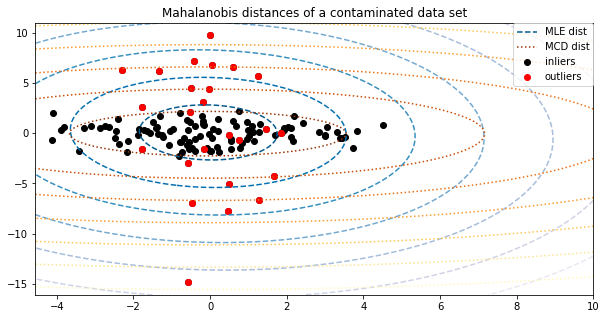

In [144]:
fig, ax = plt.subplots(figsize=(10, 5))
# Plot data set
inlier_plot = ax.scatter(X[:, 0], X[:, 1],
                         color='black', label='inliers')
outlier_plot = ax.scatter(X[:, 0][-n_outliers:], X[:, 1][-n_outliers:],
                          color='red', label='outliers')
ax.set_xlim(ax.get_xlim()[0], 10.)
ax.set_title("Mahalanobis distances of a contaminated data set")

# Create meshgrid of feature 1 and feature 2 values
xx, yy = np.meshgrid(np.linspace(plt.xlim()[0], plt.xlim()[1], 100),
                     np.linspace(plt.ylim()[0], plt.ylim()[1], 100))
zz = np.c_[xx.ravel(), yy.ravel()]
# Calculate the MLE based Mahalanobis distances of the meshgrid
mahal_emp_cov = emp_cov.mahalanobis(zz)
mahal_emp_cov = mahal_emp_cov.reshape(xx.shape)
emp_cov_contour = plt.contour(xx, yy, np.sqrt(mahal_emp_cov),
                              cmap=plt.cm.PuBu_r, linestyles='dashed')
# Calculate the MCD based Mahalanobis distances
mahal_robust_cov = robust_cov.mahalanobis(zz)
mahal_robust_cov = mahal_robust_cov.reshape(xx.shape)
robust_contour = ax.contour(xx, yy, np.sqrt(mahal_robust_cov),
                            cmap=plt.cm.YlOrBr_r, linestyles='dotted')

# Add legend
ax.legend([emp_cov_contour.collections[1], robust_contour.collections[1],
          inlier_plot, outlier_plot],
          ['MLE dist', 'MCD dist', 'inliers', 'outliers'],
          loc="upper right", borderaxespad=0)

plt.show()

## Isolation Forest

This example is taken from the sklearn [official documentation](https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html#sphx-glr-auto-examples-ensemble-plot-isolation-forest-py). Please refer to it to learn more.


In [145]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import random

In [146]:
rng = np.random.RandomState(42)

In [147]:
# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

In [148]:
# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

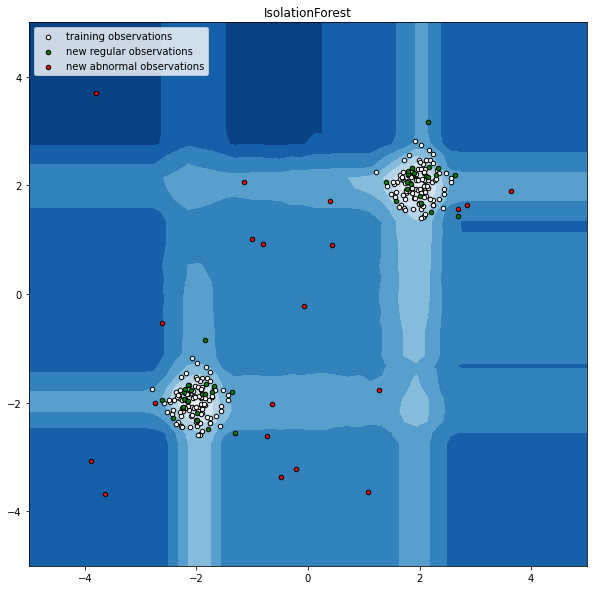

In [149]:
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()

## Local Outlier Factor

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import LocalOutlierFactor

In [151]:
X=pd.DataFrame(np.array([[1,1],[1,0],[3,2],[2,0]]),columns=["x","y"],index=["a","b","c","d"])

In [152]:
X.head()

,x,y
a,1,1
b,1,0
c,3,2
d,2,0


In [153]:
pairwise_distances(X,metric="manhattan") # to check the distances


array([[0., 1., 3., 2.],
       [1., 0., 4., 1.],
       [3., 4., 0., 3.],
       [2., 1., 3., 0.]])

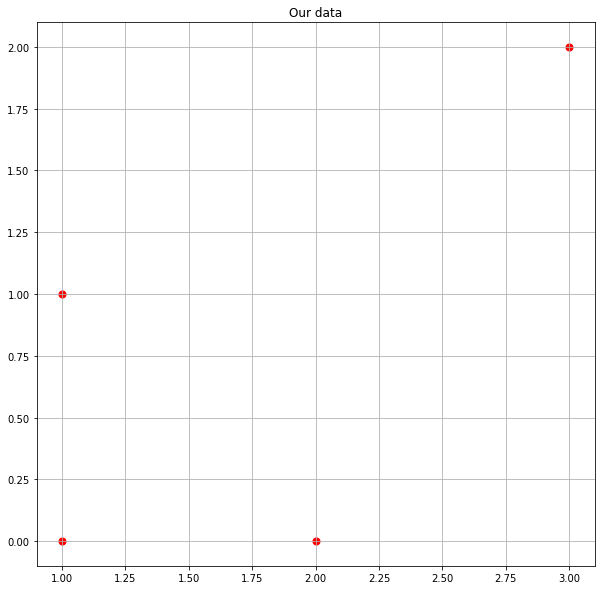

In [154]:
plt.scatter(X.x, X.y, color = "r", s = 50); # to visualize the points
plt.grid()
plt.title("Our data"); #for the title

In [155]:
LOF = LocalOutlierFactor(n_neighbors = 2, metric="manhattan") # (k number of neighbors,distance measure)

LOF.fit_predict(X) #to predict the outliers - 1 inlier, -1 outlier

array([ 1,  1, -1,  1])

## One-Class Support Vector Machine

In [156]:
from sklearn.svm import OneClassSVM

In [157]:
clf = OneClassSVM(gamma='auto').fit(X)

In [158]:
clf.predict(X) # Returns -1 for outliers and 1 for inliers.

array([-1,  1, -1,  1])

In [159]:
clf.score_samples(X)

array([0.86911864, 0.86956392, 0.86879877, 0.86956392])